# Analyze and visualize last.fm listening history

The csv data files were created with [lastfm_downloader.ipynb](lastfm_downloader.ipynb)

In [1]:
import pytz, numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib.font_manager as fm
from datetime import datetime as dt
%matplotlib inline

In [2]:
# define the fonts to use for plots
family = 'Myriad Pro'
title_font = fm.FontProperties(family=family, style='normal', size=20, weight='normal', stretch='normal')
label_font = fm.FontProperties(family=family, style='normal', size=16, weight='normal', stretch='normal')
ticks_font = fm.FontProperties(family=family, style='normal', size=12, weight='normal', stretch='normal')
ticks_font_h = fm.FontProperties(family=family, style='normal', size=10, weight='normal', stretch='normal')

## Top artists

In [3]:
artists_most = pd.read_csv('data/lastfm_top_artists.csv', encoding='utf-8')
artists_most = artists_most.set_index('artist')['play_count'].head(25)
artists_most.head()

artist
The Kinks              2718
David Bowie            2588
The Beatles            2431
Belle and Sebastian    2292
Radiohead              2151
Name: play_count, dtype: int64

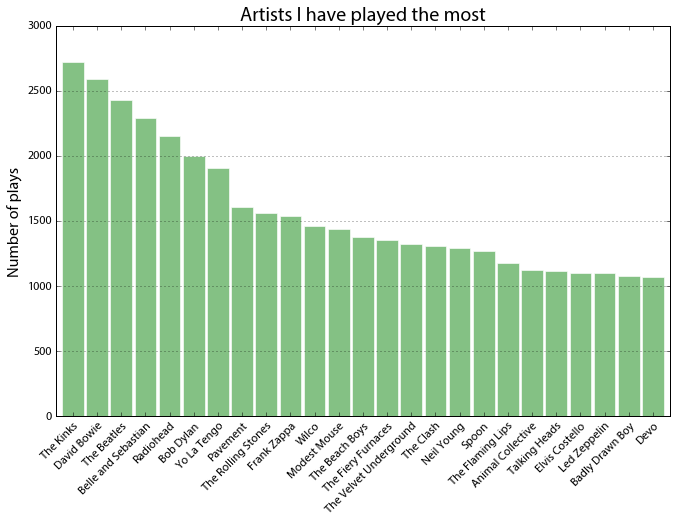

In [4]:
ax = artists_most.plot(kind='bar', figsize=[11, 7], width=0.9, alpha=0.6, color='#339933', edgecolor='w')

ax.yaxis.grid(True)
ax.set_xticklabels(artists_most.index, rotation=45, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

ax.set_title('Artists I have played the most', fontproperties=title_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_ylabel('Number of plays', fontproperties=label_font)

plt.savefig('images/lastfm-artists-played-most.png', dpi=96, bbox_inches='tight')
plt.show()

## Top tracks

In [5]:
tracks_most = pd.read_csv('data/lastfm_top_tracks.csv', encoding='utf-8')
index = tracks_most.apply(lambda x: u'{}\n{}'.format(x['artist'], x['track']), axis='columns')
tracks_most = tracks_most.set_index(index).drop(labels=['artist', 'track'], axis='columns')
tracks_most = tracks_most['play_count'].head(20)
tracks_most.head()

Wolf Parade\nModern World                 133
The Kinks\nWaterloo Sunset                126
Badly Drawn Boy\nOnce Around the Block    117
The Zombies\nThis Will Be Our Year        113
The Kinks\nDays                           104
Name: play_count, dtype: int64

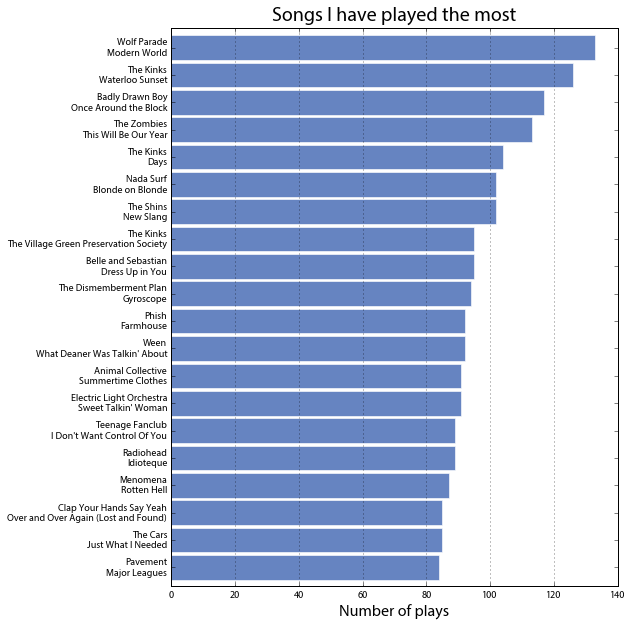

In [6]:
ax = tracks_most.sort_values().plot(kind='barh', figsize=[8, 10], width=0.9, alpha=0.6, color='#003399', edgecolor='w')
ax.xaxis.grid(True)
for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font_h)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font_h)
ax.set_xlabel('Number of plays', fontproperties=label_font)
ax.set_ylabel('', fontproperties=label_font)
ax.set_title('Songs I have played the most', fontproperties=title_font, y=1.005)

plt.savefig('images/lastfm-artists-played-most-h.png', dpi=96, bbox_inches='tight')
plt.show()

## Top albums

In [7]:
albums_most = pd.read_csv('data/lastfm_top_albums.csv', encoding='utf-8')
index = albums_most.apply(lambda x: u'{}\n{}'.format(x['artist'], x['album']), axis='columns')
albums_most = albums_most.set_index(index).drop(labels=['artist', 'album'], axis='columns')
albums_most = albums_most['play_count'].head(30)
albums_most.head()

The Kinks\nThe Kink Kronikles                 746
Frank Black\nTeenager of the Year             703
Devo\nPioneers Who Got Scalped                690
The Zombies\nOdessey and Oracle               675
Badly Drawn Boy\nThe Hour of Bewilderbeast    611
Name: play_count, dtype: int64

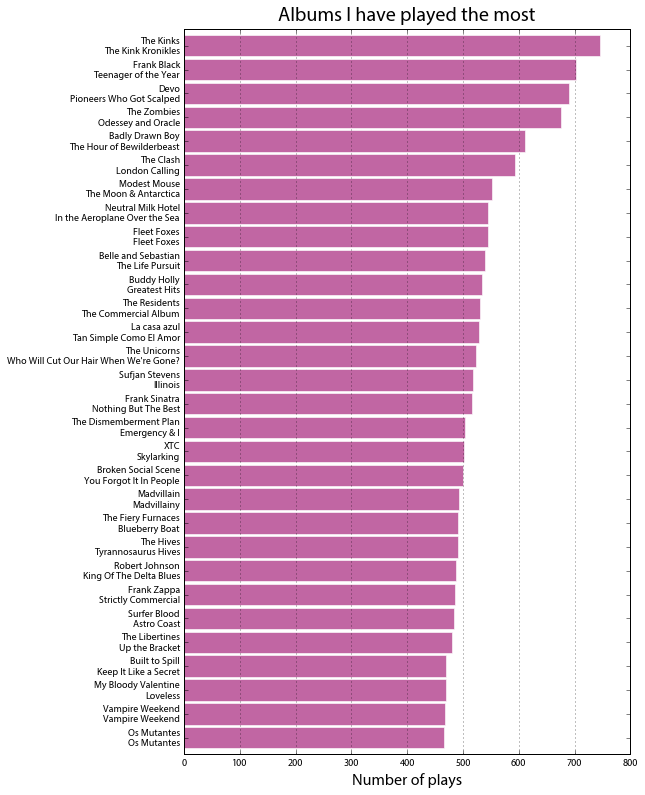

In [8]:
ax = albums_most.sort_values().plot(kind='barh', figsize=[8, 13], width=0.9, alpha=0.6, color='#990066', edgecolor='w')
ax.xaxis.grid(True)
for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font_h)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font_h)
ax.set_xlabel('Number of plays', fontproperties=label_font)
ax.set_ylabel('', fontproperties=label_font)
ax.set_title('Albums I have played the most', fontproperties=title_font, y=1.005)

plt.savefig('images/lastfm-albums-played-most-h.png', dpi=96, bbox_inches='tight')
plt.show()

## All-time scrobbles

In [9]:
# read the all-time scrobbles data set
scrobbles = pd.read_csv('data/lastfm_scrobbles.csv', encoding='utf-8')
scrobbles = scrobbles.drop('timestamp', axis=1)
print '{:,} total scrobbles'.format(len(scrobbles))
print '{:,} total artists'.format(len(scrobbles['artist'].unique()))

226,308 total scrobbles
15,302 total artists


According to the last.fm web site, I have ~262,000 scrobbles. This API endpoint seems to miss the ones from before 2007.

In [10]:
# convert to datetime
scrobbles['timestamp'] = pd.to_datetime(scrobbles['datetime'])

In [11]:
# functions to convert UTC to Pacific time zone and extract date/time elements
convert_tz = lambda x: x.to_datetime().replace(tzinfo=pytz.utc).astimezone(pytz.timezone('US/Pacific'))
get_year = lambda x: convert_tz(x).year
get_month = lambda x: '{}-{:02}'.format(convert_tz(x).year, convert_tz(x).month) #inefficient
get_day = lambda x: convert_tz(x).day
get_hour = lambda x: convert_tz(x).hour

In [12]:
# parse out date and time elements
scrobbles['year'] = scrobbles['timestamp'].map(get_year)
scrobbles['month'] = scrobbles['timestamp'].map(get_month)
scrobbles['day'] = scrobbles['timestamp'].map(get_day)
scrobbles['hour'] = scrobbles['timestamp'].map(get_hour)
scrobbles = scrobbles.drop(labels=['datetime'], axis=1)

# drop rows with 01-01-1970 as timestamp
scrobbles = scrobbles[scrobbles['year'] > 1970]
scrobbles.head()

,artist,album,track,timestamp,year,month,day,hour
0,Grandaddy,Sumday,Saddest Vacant Lot In All The World,2016-04-14 20:50:50,2016,2016-04,14,13
1,Grandaddy,Sumday,Yeah Is What We Had,2016-04-14 20:47:05,2016,2016-04,14,13
2,Grandaddy,Sumday,El Caminos In The West,2016-04-14 20:43:43,2016,2016-04,14,13
3,Grandaddy,Sumday,Lost On Yer Merry Way,2016-04-14 20:37:26,2016,2016-04,14,13
4,Grandaddy,Sumday,The Group Who Couldn't Say,2016-04-14 20:33:18,2016,2016-04,14,13


Timestamp is UTC but the year, month, day, hour columns are Pacific Time

## Year analysis

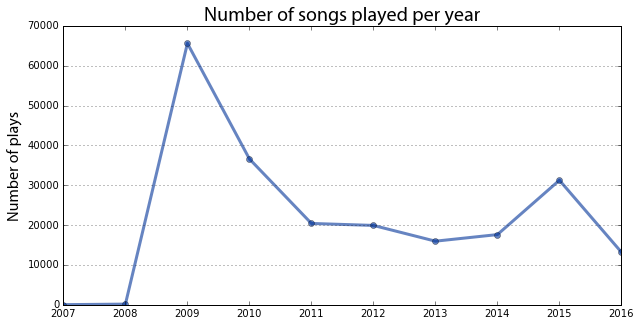

In [13]:
year_counts = scrobbles['year'].value_counts().sort_index()
ax = year_counts.plot(kind='line', figsize=[10, 5], linewidth='3', alpha=0.6, marker='o', color='#003399')

ax.yaxis.grid(True)
ax.set_xticklabels(year_counts.index, rotation=0, rotation_mode='anchor', ha='center')
ax.set_ylabel('Number of plays', fontproperties=label_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_title('Number of songs played per year', fontproperties=title_font)

plt.savefig('images/lastfm-scrobbles-per-year.png', dpi=96, bbox_inches='tight')
plt.show()

## Month analysis

In [14]:
month_counts = scrobbles['month'].value_counts().sort_index()

# not every month necessarily has a scrobble, so fill in missing months with zero counts
date_range = pd.date_range(start=min(scrobbles['timestamp']), end=max(scrobbles['timestamp']), freq='D')
months_range = date_range.map(lambda x: str(x.date())[:-3])
index = np.unique(months_range)
month_counts = month_counts.reindex(index, fill_value=0)

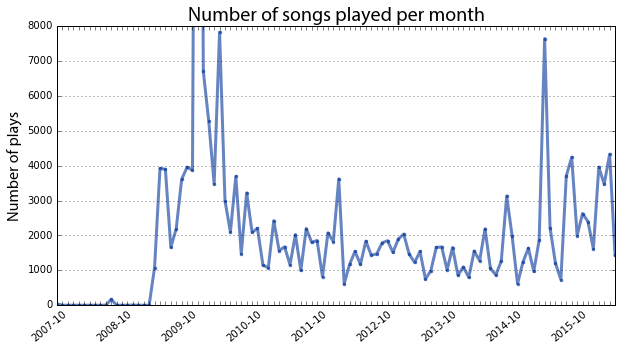

In [15]:
ax = month_counts.plot(kind='line', figsize=[10, 5], linewidth='3', alpha=0.6, marker='.', color='#003399')

xlabels = month_counts.iloc[range(1, len(month_counts), 12)].index
xlabels = [x if x in xlabels else '' for x in month_counts.index]
ax.set_xticks(range(len(xlabels)))
ax.set_xticklabels(xlabels, rotation=40, rotation_mode='anchor', ha='right')

ax.yaxis.grid(True)
ax.set_ylim((0,8000))
ax.set_ylabel('Number of plays', fontproperties=label_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_title('Number of songs played per month', fontproperties=title_font)

plt.savefig('images/lastfm-scrobbles-per-month.png', dpi=96, bbox_inches='tight')
plt.show()

## Hour of the day analysis

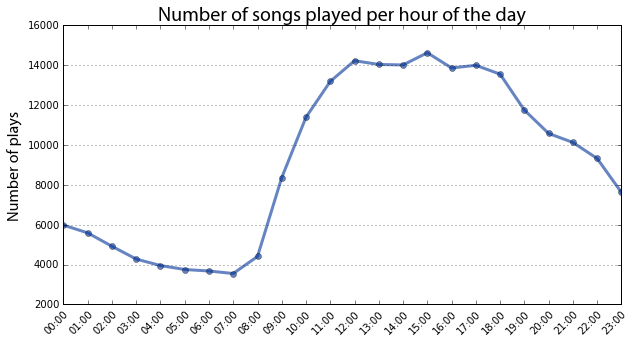

In [16]:
hour_counts = scrobbles['hour'].value_counts().sort_index()
ax = hour_counts.plot(kind='line', figsize=[10, 5], linewidth='3', alpha=0.6, marker='o', color='#003399')

xlabels = hour_counts.index.map(lambda x: '{:02}:00'.format(x))
ax.set_xticks(range(len(xlabels)))
ax.set_xticklabels(xlabels, rotation=45, rotation_mode='anchor', ha='right')

ax.yaxis.grid(True)
ax.set_ylabel('Number of plays', fontproperties=label_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_title('Number of songs played per hour of the day', fontproperties=title_font)

plt.savefig('images/lastfm-scrobbles-per-hour.png', dpi=96, bbox_inches='tight')
plt.show()